In [1]:
import seaborn as sns

In [2]:
sns.__version__

'0.11.1'

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

# Seaborn的使用结构

- seaborn的借口都是扁平的，都通过seaborn.xx()调用
- 但是借口之间有上下级关系，存在着彼此调用
- seaborn的绘图函数主要分类三类，如下所示
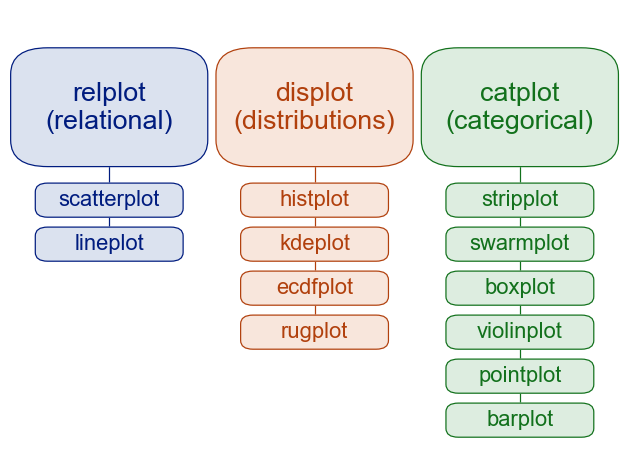
- 在每个类别中，都存在两种函数
    1. 基于坐标轴的，axes-level,简单理解就是绘制单图的函数  
        - 绘图对象是plt中的Axes
    2. 基于图的，Figure-level,简单理解就是绘制多图的函数，通过调用单图实现  
        - 绘图对象是FacetGrid
        - 对应上图中的三个顶类函数relplot，displot,catplot

# Figure-Level 绘图 displot 
- 调用数据集出现URL故障时，请参考：[链接](https://blog.csdn.net/weixin_40815637/article/details/109311371)

In [4]:
penguin = sns.load_dataset('penguins',cache=True,data_home='../../seaborn-data')

In [5]:
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


- displot是Figure级别的绘图函数，通过kind可以调用低级的hist,kde等绘图函数
- 注意与axe级别绘图不同，它的legend在图外边

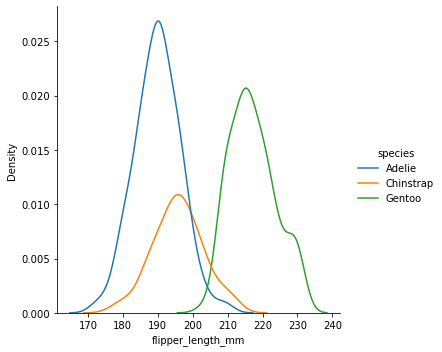

In [11]:
sns.displot(data = penguin,x = 'flipper_length_mm',hue ='species',kind='kde')

- 通过g.ax可以获得Figure-level对象的坐标轴，并添加其他子图

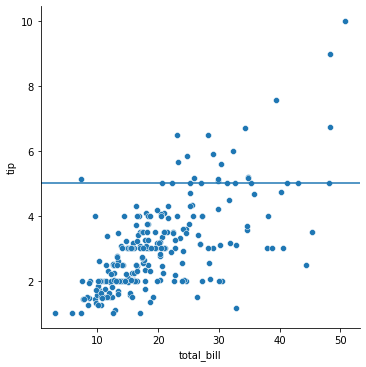

In [31]:
tips = sns.load_dataset("tips",cache=True,data_home='../../seaborn-data/')
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axhline(y = 5)

- 修改图的属性
- Figure类型的图能智能将标签应用在子图上

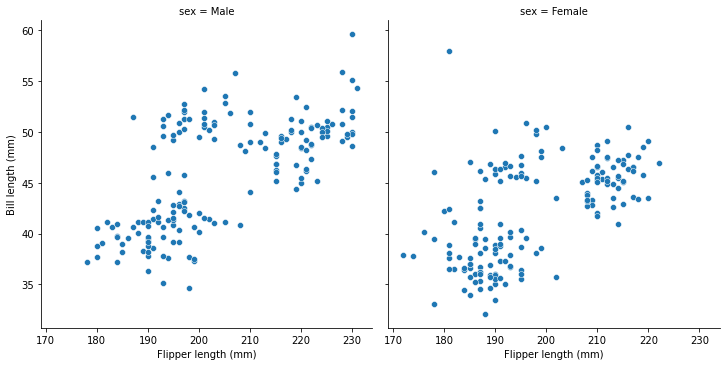

In [33]:
g = sns.relplot(data=penguin, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

- 使用col,row等参数，可以绘制多个子图
- 在参数中，可以直接加入axe函数的参数，比如bins

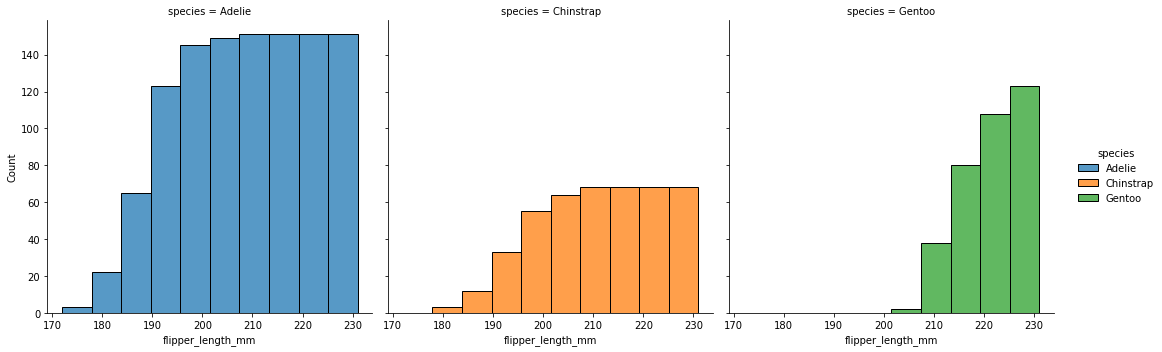

In [15]:
sns.displot(data = penguin,x = 'flipper_length_mm',hue ='species',col='species',cumulative = True,bins = 10)

- 通过height,aspect可以控制子图的大小和形状
- width=height*aspect
- 默认情况下，每个子图都是正方形

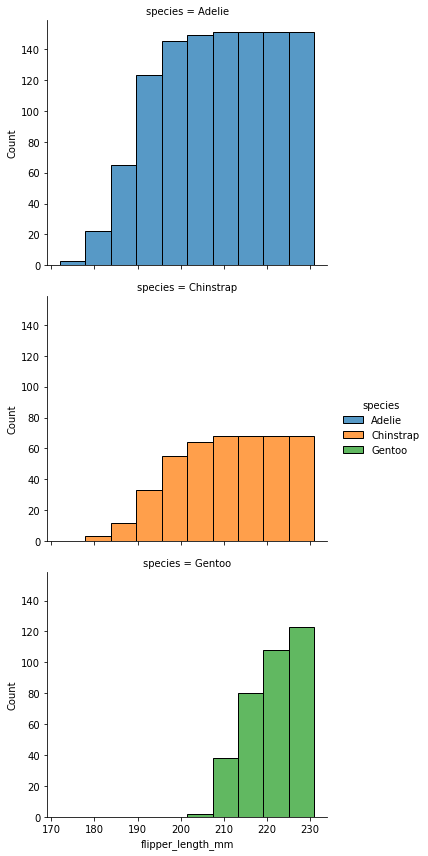

In [34]:
sns.displot(data = penguin,x = 'flipper_length_mm',hue ='species',col='species'
            ,cumulative = True,bins = 10,col_wrap=1,height=4,aspect=1.2)

# Axe-Level绘图 histplot直方图 
- 默认会自动通过plt.gca获得当前正在绘制的axe

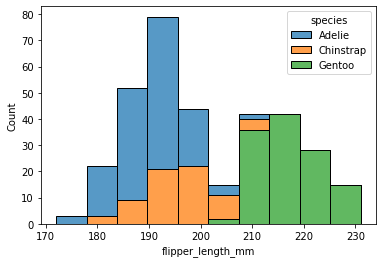

In [7]:
sns.histplot(data = penguin,x = 'flipper_length_mm',hue ='species',multiple='stack')

- 可以指定ax = xx来指定绘制到那个坐标轴上

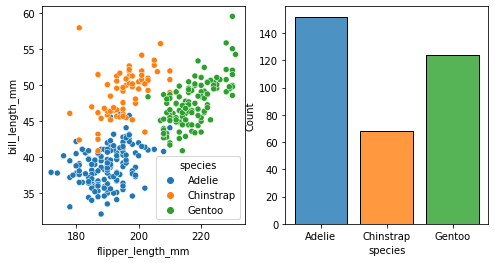

In [18]:
f,[ax1,ax2] = plt.subplots(1,2,figsize = (8,4))
sns.scatterplot(data=penguin, x="flipper_length_mm", y="bill_length_mm", hue="species",ax = ax1)
sns.histplot(data=penguin, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=ax2)

- kde分布拟合图

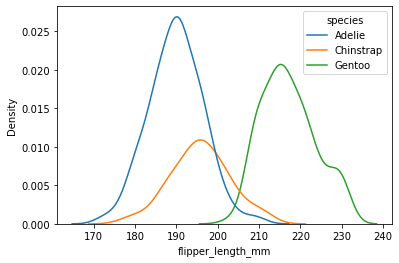

In [8]:
sns.kdeplot(data = penguin,x = 'flipper_length_mm',hue ='species')

# 在同一张图上绘制多个视图

## joinplot
- 在坐标轴上绘制变量的一维分布

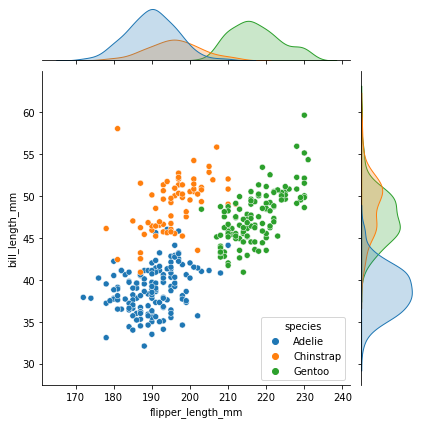

In [35]:
sns.jointplot(data=penguin,x = 'flipper_length_mm',y = 'bill_length_mm',
             hue = 'species')

## pairplot()
- 会将所有数值型的列作为变量，两两组合绘制子图

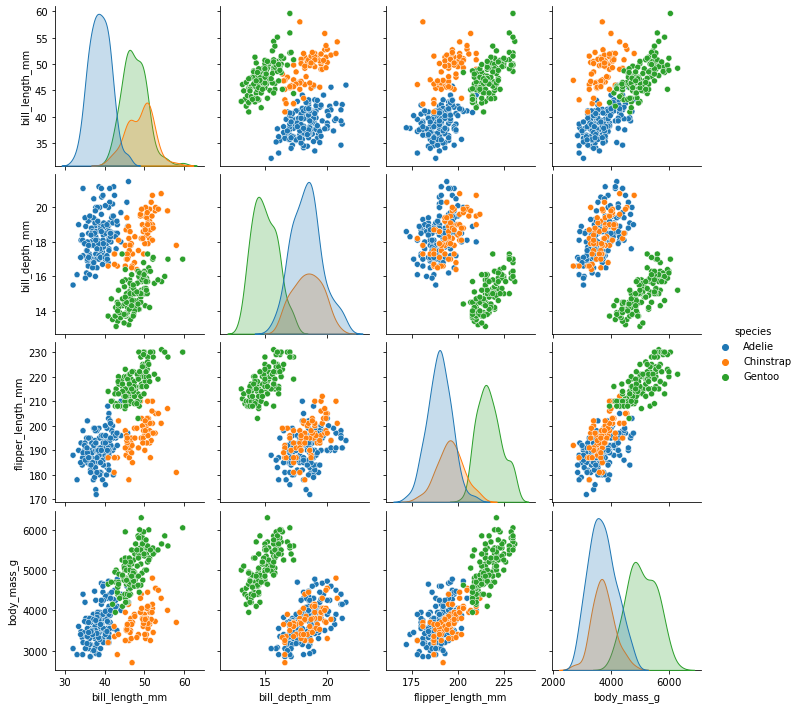

In [36]:
sns.pairplot(data=penguin,hue='species')

# seaborn接受的数据类型

## 长表long-table
- 每一列都是一个变量
- 每一行是一个样本（观察值）

In [3]:
flight = sns.load_dataset('flights',cache=True,data_home='../../seaborn-data/')
flight.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


- 通过指定数据源，x,y的列名来绘制图 
- style来指定线型

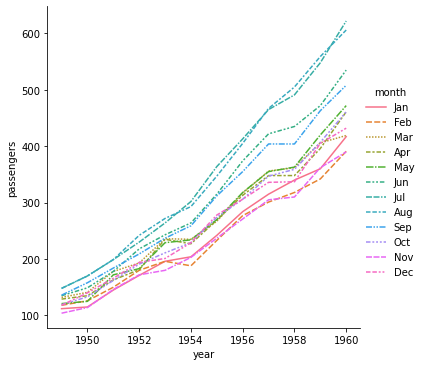

In [9]:
sns.relplot(data=flight,x='year',y = 'passengers',hue='month',kind='line',style='month')

## 宽表wide-table
- 每一个行列交汇的点是一个样本点，而变量则是index和columns
- seaborn不支持多级索引

In [5]:
flight_wide = flight.pivot(index='year',columns='month',values='passengers')
flight_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


- 宽表绘图时，会自动将index和columns当做x,y 
- 注意线性会不同

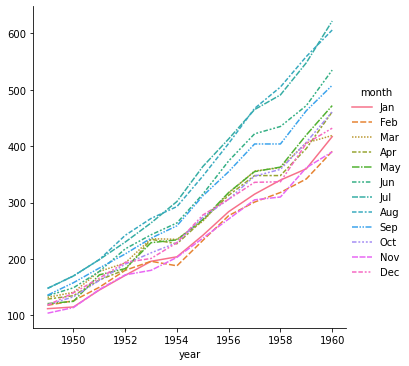

In [8]:
sns.relplot(data=flight_wide,kind='line')

- 在使用宽表时，有时候变量会不可预测
- 比如当绘制单变量的图时，你不能确定index和columns哪一个被分配给x

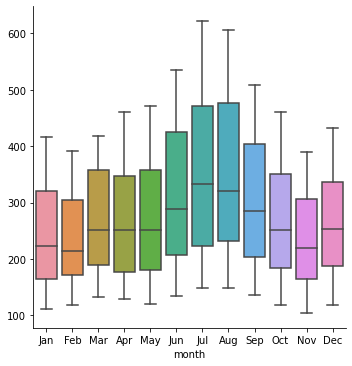

In [12]:
sns.catplot(data=flight_wide, kind="box")

## 脏数据
- 既不是宽表也不是长表

In [13]:
anagrams = sns.load_dataset("anagrams",cache=True,data_home='../../seaborn-data/')
anagrams

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8
5,6,divided,5,5.0,6
6,7,divided,5,4.5,6
7,8,divided,5,7.0,8
8,9,divided,2,3.0,7
9,10,divided,6,5.0,6


- 绘图时要先将原表转换为宽表或者长表

In [16]:
ana_long = anagrams.melt(id_vars=["subidr", "attnr"],var_name="solutions", value_name="score")
ana_long.head()

,subidr,attnr,solutions,score
0,1,divided,num1,2.0
1,2,divided,num1,3.0
2,3,divided,num1,3.0
3,4,divided,num1,5.0
4,5,divided,num1,4.0


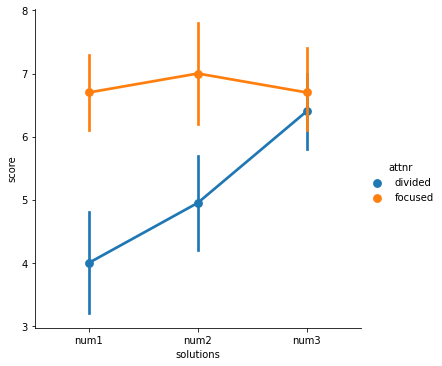

In [17]:
sns.catplot(data=ana_long, x="solutions", y="score", hue="attnr", kind="point")